<a href="https://colab.research.google.com/github/pkant-0/scikit-learn/blob/main/Diesel_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diesel Prediction Model with scikit-learn**

# 1.
Multiple Linear Regression:
In this model, we predict the selling price of a car based on various features, including the present price of the car. The dataset typically includes information like the car’s year, kilometers driven, fuel type (diesel, petrol, or CNG), seller type (dealer or individual), transmission type (manual or automatic), and the number of previous owners.
By analyzing historical data, we can build a regression model that estimates the selling price based on these features. Multiple Linear Regression is commonly used for this purpose1.
LSTM (Long Short-Term Memory) Model:
For time series data, such as diesel prices over time, an LSTM model can be effective. LSTM is a type of recurrent neural network (RNN) that can capture temporal dependencies.
In the case of diesel price prediction, the model takes input data from the previous 90 days (or any suitable window) and predicts the price for the next day. It’s implemented using Keras (with TensorFlow as the backend)
# 2.
Naïve Bayes Classifier:
While Naïve Bayes is commonly used for text classification, it has also been applied to predict diesel prices in India.
The analysis involves gathering historical data on diesel prices and training the Naïve Bayes classifier to make predictions about future price trends
# 3.
Custom Models:
Some data scientists create custom models by combining different techniques, such as ensemble methods (Random Forests, Gradient Boosting), time series decomposition, or even deep learning architectures.
These models may incorporate additional features, external economic indicators, or domain-specific knowledge.

In [3]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [4]:
pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy import stats
import bokeh
from bokeh.models import ColumnDataSource
import sklearn
from sklearn.linear_model import LinearRegression
import os

In [2]:
df = pd.read_csv("/content/petrol_price.csv")

In [3]:
df

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,12/28/2020,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635
1357,01/04/2021,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640
1358,01/11/2021,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670
1359,01/18/2021,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696


In [4]:
df.head(7)

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
5,02/06/1995,1.124,1.103,1.218,1.076,1.062,1.159,1.169,1.157,1.288,1.270,1.250,1.368,1.086
6,02/13/1995,1.121,1.099,1.218,1.074,1.058,1.158,1.166,1.153,1.285,1.265,1.243,1.367,1.088


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1361 non-null   object 
 1   A1      1361 non-null   float64
 2   A2      1361 non-null   float64
 3   A3      1361 non-null   float64
 4   R1      1361 non-null   float64
 5   R2      1361 non-null   float64
 6   R3      1361 non-null   float64
 7   M1      1361 non-null   float64
 8   M2      1361 non-null   float64
 9   M3      1361 non-null   float64
 10  P1      1361 non-null   float64
 11  P2      1361 non-null   float64
 12  P3      1361 non-null   float64
 13  D1      1361 non-null   float64
dtypes: float64(13), object(1)
memory usage: 149.0+ KB


In [6]:
df.describe()

,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000
mean,2.285680,2.234511,2.396873,2.225170,2.178511,2.329126,2.382822,2.320970,2.508877,2.519840,2.472096,2.609244,2.404699
std,0.859028,0.843815,0.883311,0.850143,0.835549,0.876739,0.882107,0.858521,0.908861,0.911055,0.894472,0.925587,0.998646
min,0.949000,0.926000,1.039000,0.907000,0.885000,0.974000,1.008000,0.979000,1.112000,1.100000,1.074000,1.191000,0.953000
25%,1.461000,1.433000,1.550000,1.421000,1.393000,1.489000,1.517000,1.482000,1.616000,1.607000,1.573000,1.695000,1.418000
50%,2.326000,2.251000,2.458000,2.237000,2.175000,2.367000,2.481000,2.404000,2.627000,2.693000,2.640000,2.769000,2.479000
75%,2.903000,2.825000,3.060000,2.828000,2.765000,2.976000,3.033000,2.930000,3.206000,3.209000,3.127000,3.318000,3.070000
max,4.165000,4.102000,4.301000,4.114000,4.054000,4.247000,4.229000,4.153000,4.387000,4.344000,4.283000,4.459000,4.764000


In [7]:
df.isnull()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1357,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1358,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1359,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df_diesel = df.drop(columns=['A1',	'A2',	'A3',	'R1',	'R2',	'R3'	,'M1'	,'M2',	'M3'	,'P1'	, 'P2',	'P3'])

In [10]:
df_diesel

,Date,D1
0,01/02/1995,1.104
1,01/09/1995,1.102
2,01/16/1995,1.100
3,01/23/1995,1.095
4,01/30/1995,1.090
...,...,...
1356,12/28/2020,2.635
1357,01/04/2021,2.640
1358,01/11/2021,2.670
1359,01/18/2021,2.696


In [11]:
df_diesel.rename( columns= {'D1': 'Diesel'}, inplace=True)

In [14]:
df_diesel

,Date,Diesel
0,1995-01-02,1.104
1,1995-01-09,1.102
2,1995-01-16,1.100
3,1995-01-23,1.095
4,1995-01-30,1.090
...,...,...
1356,2020-12-28,2.635
1357,2021-01-04,2.640
1358,2021-01-11,2.670
1359,2021-01-18,2.696


In [12]:
df_diesel.dtypes

Date       object
Diesel    float64
dtype: object

In [13]:
df_diesel['Date'] = pd.to_datetime(df_diesel['Date'])

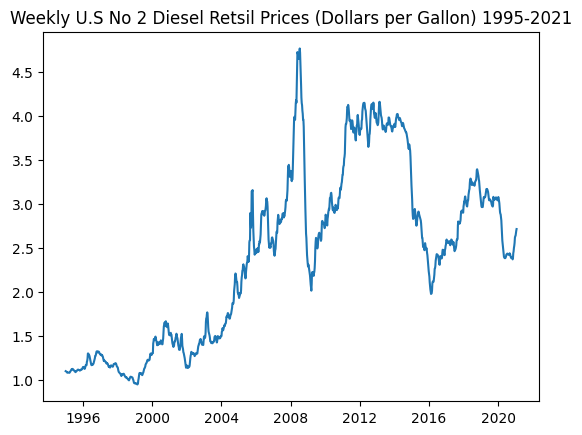

In [15]:
title = 'Weekly U.S No 2 Diesel Retsil Prices (Dollars per Gallon) 1995-2021'
import datetime
import random
import matplotlib.pyplot as plt
col1 = 'Diesel'
col2 = 'Date'
y = df_diesel[col1]
x = df_diesel[col2]
plt.plot(x, y)
plt.gca().set_title(title)
plt.show()

In [18]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
source = ColumnDataSource(df_diesel)
plot = figure(x_axis_type='datetime')
legend_diesel = 'Weekly U.S No 2 Diesel Retail Prices (Dollars per Gallon) 1995-2021'
plot.line(x='Date', y='Diesel', line_width=1, source=source, color='red', legend_label=legend_diesel)
output_notebook()
show(plot)

In [19]:
# Format = %y-%m-%d
# substring = string[0:4]

df_diesel['year'] = 0
df_diesel['year'] = df_diesel['Date'].dt.strftime('%y').astype(int)

In [20]:
df_diesel.drop(columns=['Date'])
df_diesel.head(5)

,Date,Diesel,year
0,1995-01-02,1.104,95
1,1995-01-09,1.102,95
2,1995-01-16,1.100,95
3,1995-01-23,1.095,95
4,1995-01-30,1.090,95


In [21]:
df_year = df_diesel[['year', 'Diesel']].groupby(['year'], as_index=False).mean()
df_year.head(20)

,year,Diesel
0,0,1.490769
1,1,1.400509
2,2,1.318750
3,3,1.509327
4,4,1.809942
5,5,2.401519
6,6,2.704846
7,7,2.885245
8,8,3.802962
9,9,2.467327


In [22]:
df_year.dtypes

year        int64
Diesel    float64
dtype: object

In [29]:
df_year['Diesel'] = np.log(df_year['Diesel'])

Predict Weekly U.S No 2 Diesel Retail Prices (Dollars per Gallon) 1995 - 2021
$nan USD


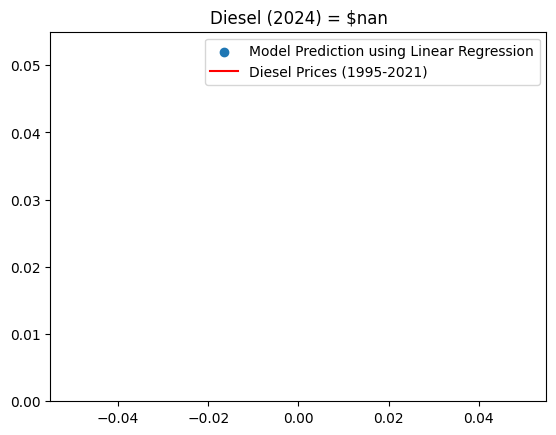

In [31]:
# To make it better variable transformation is a good idea in this model to compare before and after

from scipy import stats
x = df_year['year']
y = df_year['Diesel']
slope, intercept, r, p, std_err = stats.linregress(x, y) # scipy
def modelPrediction(x):
  return slope * x * intercept

label = 'Predict Weekly U.S No 2 Diesel Retail Prices (Dollars per Gallon) 1995 - 2021'
model = list(map(modelPrediction, x)) # Scipy
x_pred = 2024
y_pred = modelPrediction(x_pred)
print(label)
round(y_pred, 2)
print('${} USD'.format(y_pred))
title = 'Diesel (2024) = ${}'.format(y_pred)
plt.title(title)
plt.scatter(x, y) # Scatter Plot
plt.plot(x, model, color = 'red')
plt.ylim(ymin=0) # Starts at zero
plt.legend(['Model Prediction using Linear Regression', 'Diesel Prices (1995-2021)'])
plt.show()

